In [23]:
import pandas as pd

In [24]:
data=pd.read_csv('ballads40_metadata.tsv',sep='\t')
data

,id,signature,author,title,first_line,genre_subtitle,source_name,place,year,volume,...,regularity,claus,rhyme,graphic_stanzas,stanza_model,stanza_type,other,nlines,narrator,dir_speech
0,1_1840_Alekseyev.txt,NaN,Алексеев П.Ф.,Могила,Во сыром бору могила,баллада,Лирические стихотворения и сказки П. Ф. Алексеева,Дерпт,1840,NaN,...,reg,жжмм,rhymed,True,Х4AAbb,катрен,NaN,44,heterodiegetic,True
1,2_1840_Alekseyev.txt,NaN,Алексеев П.Ф.,Наяда,В серебре живом каскада,NaN,Лирические стихотворения и сказки П. Ф. Алексеева,Дерпт,1840,NaN,...,reg,жжмжжм,rhymed,False,Х4AAbCCb,шестистишие,NaN,12,homodiegetic,False
2,3_1840_Alekseyev.txt,NaN,Алексеев П.Ф.,Разбойник,"Ночь, чернее угля с сажей",NaN,Лирические стихотворения и сказки П. Ф. Алексеева,Дерпт,1840,NaN,...,reg,ж-м,rhymed,False,unreg,вольная рифмовка,NaN,42,heterodiegetic,True
3,4_1840_Alekseyev.txt,NaN,Алексеев П.Ф.,Ночной ездок,Над безмолвною пустыней,баллада,Лирические стихотворения и сказки П. Ф. Алексеева,Дерпт,1840,NaN,...,reg,жмжм,rhymed,True,Х4AbAb,катрен,рефрен (строфы),36,heterodiegetic,False
4,5_1840_Demidov.txt,NaN,Демидов М. А.,Званые гости,Близ Ревеля рыцарь Гогаузен жил,NaN,Дельные безделки. Стихотворения М. Демидова. В...,М.,1840,NaN,...,reg,мм,rhymed,True,Ам4aa,двустишие,NaN,72,heterodiegetic,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,208_1849_Miller.txt,NaN,Миллер Ф. Б.,Мавританский князь,Дружину свою снарядил он на бой,баллада,Стихотворения Ф. Миллера. 1841-1849,М.,1849,NaN,...,reg,мммм,rhymed,True,Ам4aabb,катрен,NaN,80,heterodiegetic,True
185,209_1849_Miller.txt,NaN,Миллер Ф. Б.,Воздушный караван,"Поздно ночью мы лежали на земле, среди равнины",NaN,Стихотворения Ф. Миллера. 1841-1850,М.,1849,NaN,...,reg,жжжж,rhymed,True,Х8AABB,катрен,NaN,40,homodiegetic,True
186,210_1849_Miller.txt,NaN,Миллер Ф. Б.,Ива,Хорошо в саду тенистом,баллада,Стихотворения Ф. Миллера. 1841-1851,М.,1849,NaN,...,reg,жжмжжм,rhymed,True,Х4AAbCCb,шестистишие,NaN,84,heterodiegetic,True
187,211_1846_Nekrasov.txt,NaN,Некрасов Н. А.,В дороге,Скучно! скучно!.. Ямщик удалой,NaN,"Петербургский сборник, изданный Н. Некрасовым",СПб.,1846,NaN,...,reg,м-ж,unreg,False,unreg,вольная рифмовка,NaN,83,homodiegetic,True


In [25]:
data["nlines"].describe()

count    189.000000
mean      58.820106
std       56.182353
min       10.000000
25%       28.000000
50%       44.000000
75%       70.000000
max      408.000000
Name: nlines, dtype: float64

Количество баллад, написанных в каждый год выборки

In [26]:
years_mode = data['year'].value_counts()
years_mode

year
1840    35
1841    33
1842    25
1846    16
1847    16
1850    14
1843    13
1844    12
1845    10
1848     9
1849     6
Name: count, dtype: int64

Столбсчатая диаграмма, отражающая данные выше (количество баллад, написанных в каждый год). Очевидна явная отрицательная тенденция.

<Axes: xlabel='year'>

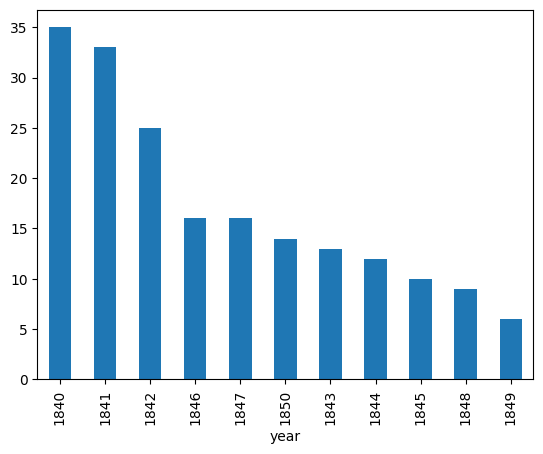

In [27]:
years_mode.plot(kind="bar")

Среднее количество строк в балладах в каждый год. В целом, длина произведений относительно стабильна за исключением 1844 (из-за выброса) и 1850 года (когда популярность баллад крайне низка вообще).

In [28]:
years_lines_average = data.groupby("year")["nlines"].mean()
years_lines_average

year
1840    63.714286
1841    57.606061
1842    55.360000
1843    63.384615
1844    93.250000
1845    44.000000
1846    50.250000
1847    55.000000
1848    61.666667
1849    69.666667
1850    40.142857
Name: nlines, dtype: float64

Диаграмма рассеяния, на которой явно видны выбросы.

<Axes: xlabel='year', ylabel='nlines'>

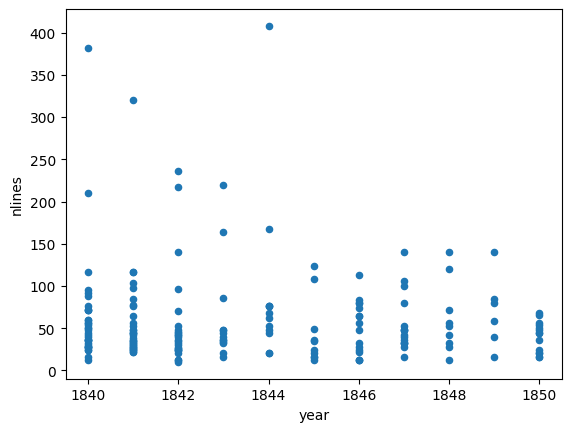

In [29]:
data.plot('year', 'nlines', kind='scatter')

Таблица, которая отображает список текстов-выбросов. За выбросы принимаем те тексты, в которых более 200 строк.

In [30]:
data[data['nlines']>200]

,id,signature,author,title,first_line,genre_subtitle,source_name,place,year,volume,...,regularity,claus,rhyme,graphic_stanzas,stanza_model,stanza_type,other,nlines,narrator,dir_speech
21,24_1840_Papkevich.txt,NaN,Папкевич А.,Цветы,Небывалая вина,Баллада из простонародного рассказа,Стихотворения А. Папкевича,СПб.,1840,NaN,...,reg,ммжж,rhymed,False,Х4aaBB,четверостишие,NaN,382,heterodiegetic,True
32,36_1841_Sokolova.txt,NaN,Соколова Т.,Эдвин и Лора,Страстью отрадно,Баллада,Стихотворения Таисии Соколовой. Ч. 2,М.,1841,NaN,...,reg,ж-м,rhymed,True,unreg,вольная рифмовка с холостыми,NaN,320,heterodiegetic,True
46,53_1842_Molchanov.txt,NaN,Молчанов Н.,Виктор и Георгина или Урна в бору,"Не узнает никто, я как сокол примчусь",NaN,Стихотворения Николая Молчанова : Т. 1,СПб.,1842,NaN,...,unreg,м,rhymed,False,unreg,вольная рифмовка,NaN,217,mixed,True
55,63_1843_Zhmakin.txt,NaN,Жмакин В.А.,Гирей,Полнеба тучами покрылось,Киевский рассказ,Часы досуга: Стихотворения В. Жмакина,Казань,1843,NaN,...,reg,ж-м,rhymed,False,unreg,четверостишие,AbAb/aBBa/AbbA,220,heterodiegetic,True
139,149_1842_Pavlova.txt,К. П–ва,Павлова К. К.,Рудокоп,"В подземной тьме, в тиши глубокой",NaN,Москвитянин,М.,1842,Ч.1,...,reg,unreg,unreg,False,Я4AbAb (unreg),четверостишие + встречаются холостые,NaN,236,heterodiegetic,True
164,182_1844_Sushkov.txt,Н. Сушков,Сушков Н. В.,Сны и толки,В стары годы стиходей,Баллада. Посвящается В. А. Жуковскому,Москвитянин,М.,1844,Ч.4,...,reg,мжмж,rhymed,False,Х43aBaB,четверостишие,NaN,408,heterodiegetic,True
181,205_1840_Prokopovich.txt,Н. Прокопович,Прокопович Н. Я.,Граф Конрад и его жена,Рыцарь! Солнце взошло,Баллада,Современник,СПб.,1840,XIX,...,reg,ммжммж,rhymed,True,Ан334334aaBccB,шестистишие,NaN,210,heterodiegetic,True


Данные с авторскими жанровыми подзаголовками. Из-за странной разметки данных "баллада" дублируется в таблице, но очевидно, что жанровое определение "баллада" преобладает

In [31]:
genre = data.value_counts("genre_subtitle")
genre

genre_subtitle
баллада                                        12
Баллада                                         6
Баллады/ ПСС баллады                            6
Баллады                                         5
Баллада и рассказ                               4
1850разд. Разные стихотворения/ Баллады ПСС     1
Киевский рассказ                                1
романс                                          1
разд. Лирические стихотворения                  1
предание                                        1
Украинская баллада                              1
Скандинавская баллада                           1
Романс                                          1
Малороссийское предание                         1
Из баллад Фогля                                 1
Кавказская легенда                              1
1850разд. Разные стихотворения/Баллады ПСС      1
Баллада Вальтера Скотта                         1
Баллада. Посвящается В. А. Жуковскому           1
Баллада-фантазия                   

Данные по типу строфы в приведенных в датасете балладах. Опять же, разметка этого датасета подводит: "катрен" и "четверостишие" - синонимы. Тем не менее, очевидно преобладание четверостишия в строфике баллад (как и в поэзии XIX века в принципе).

In [32]:
stanza = data["stanza_type"].value_counts()
stanza

stanza_type
катрен                                  54
четверостишие                           44
шестистишие                             16
двустишие                               12
вольная рифмовка                        11
unreg                                    9
восьмистишие графически                  7
пятистишие                               3
десятистишие                             3
свободные строфы                         3
трехстишие                               2
восьмистишие плюс двустишие              2
восьмистишие                             2
вольная рифмовка с холостыми             2
четверостишие+вольная римовка            1
катрен+шестистишие                       1
семистишие                               1
четверостишие + встречаются холостые     1
графически 12 и 10 строк                 1
четверостишие графически                 1
четверостишие с обрамлением              1
двенадцатистишие графически              1
пятистишие гарфически                    1

Данные по типу размера в датасете баллад. На первом месте - хорей как признанно "народный" \ "фольклорный" размер. Интересно, что на втором месте - амфибрахий, нетипичный для русской поэзии этого времени размер, что скорее указывает на ориентацию авторов баллад на европейскую поэтическую традицию.

In [33]:
meter = data["meter"].value_counts()
meter

meter
Х       71
Ам      38
Я       36
Ан      15
ПМК     12
ПМФ      5
Д        4
Псл      4
ТПА      3
Эрр.     1
Name: count, dtype: int64

Данные с распределением мест публикации баллад. Ожидаемо, лидируют два литературных центра - Москва и Санкт-Петербург.

In [34]:
cities = data.value_counts("place")
cities

place
СПб.       82
М.         81
Полтава     5
Вильно      4
Дерпт       4
Киев        4
Одесса      4
Харьков     3
Воронеж     1
Казань      1
Name: count, dtype: int64

Данные о окончаниях (клаузулах и типах рифмовок) в балладах. В очередной раз наиболее частым оказывается наиболее характерное для поэзии времени явление - перекрестная рифмовка с чередованием мужской и женской клаузул (правило альтернанса).

In [35]:
clausule = data["claus"].value_counts()
clausule.head(15)

claus
жмжм        59
ж-м         13
мммм        13
мжмж        12
мм          10
жжжж         8
м-ж          8
ммжммж       6
ммжж         6
unreg        6
жжмжжм       4
жмжмжмжм     3
жжмм         2
ж            2
дмдм         2
Name: count, dtype: int64

Данные о рифме. Как ни странно, стихи в основном римфованные >:-(

In [36]:
rifma = data["rhyme"].value_counts()
rifma

rhyme
rhymed      153
unreg        25
unrhymed     11
Name: count, dtype: int64

Данные о типах строф с учетом размера, рифмовки и рифмы. Аналогичное объяснение см. выше.

In [37]:
stanza_mode = data["stanza_model"].value_counts()
stanza_mode.head(15)

stanza_model
unreg            34
Х4AbAb           23
Я4AbAb            6
Х4AAbCCb          4
Х6aa              4
Ам3ObOb           4
Я4aBaB            4
Х43AbAb           3
Х443443aaBccB     3
Х4ObOb            3
Ам3AbAb           3
Ам43AbAb          3
Ам4AbAb           3
Ам4aa             3
Х4ABAB            3
Name: count, dtype: int64

Данные о наличии прямой речи в балладах. Поскольку баллада как жанр основана диалоге, закономерно, что прямая речь встречается чаще ее отсутствия.

In [38]:
direct = data["dir_speech"].value_counts()
direct

dir_speech
True     120
False     69
Name: count, dtype: int64

Данные о типе нарративной структуре (фокализации) в балладах. В основном в текстах представлен т. н. повествователь, а не рассказчик. Это связано с характерным для баллад образом вовлеченного автора.

In [39]:
speech_type = data.groupby("narrator")["dir_speech"].sum()
speech_type

narrator
heterodiegetic    90
homodiegetic      23
mixed              7
Name: dir_speech, dtype: int64

Данные о распределении авторов в балладах.

In [40]:
authors = data["author"].value_counts()
authors.head(10)

author
Фет А. А.             17
Миллер Ф. Б.          15
Лермонтов М. Ю.       10
Некрасов Н. А.         8
Павлова К. К.          6
Глебов Л. И.           5
Струговщиков А. Н.     5
Соколова Т.            5
Чернов П.              4
Красов  В. И.          4
Name: count, dtype: int64

Данные о распределении неканонических \ канонических авторов в балладах. В основном в корпус вошли тексты периферийных авторов. Однако, на наш взгляд, определение некоторых авторов как "каноничных" кажется нам необоснованным.

In [41]:
canon = data['canon_or_not'].value_counts()
canon

canon_or_not
periphery    81
canon        63
BP           45
Name: count, dtype: int64